In [2]:
import pandas as pd

In [4]:
data = pd.read_csv('VendasCerveja.txt')

data.head()

,Data,Temperatura (°C),Vendas (Litros)
0,2024-01-01,28.5,150
1,2024-01-02,29.1,165
2,2024-01-03,27.8,140
3,2024-01-04,30.2,180
4,2024-01-05,26.9,130


In [5]:
from matplotlib import pyplot as plt

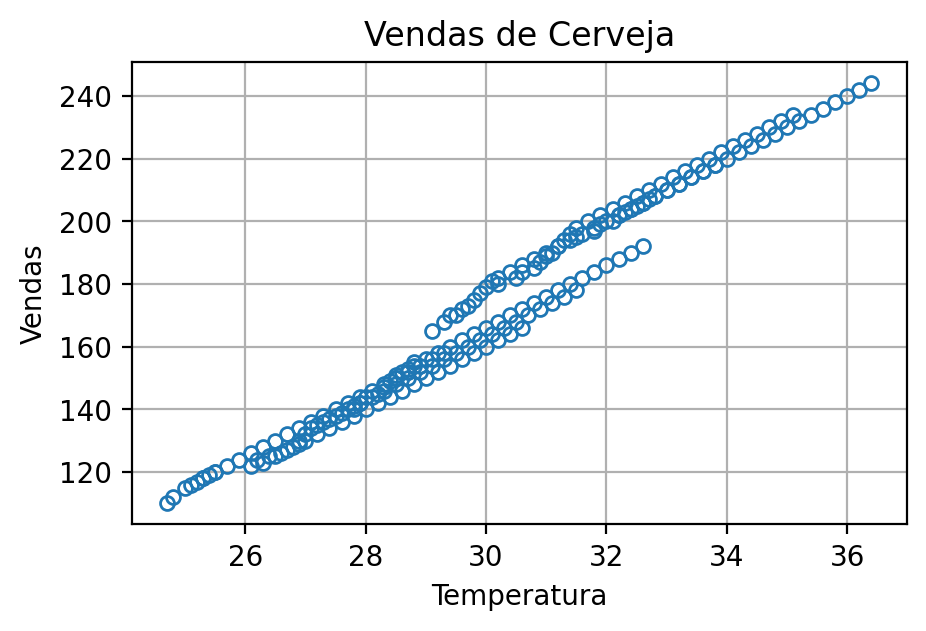

In [12]:
fig = plt.figure(figsize=(5, 3), dpi=200)
plt.plot(data['Temperatura (°C)'], data['Vendas (Litros)'], 'o', markerfacecolor='none', color='C0', markersize=5, linewidth=1)
plt.title('Vendas de Cerveja')
plt.xlabel('Temperatura')
plt.ylabel('Vendas')
plt.grid()
plt.savefig('VendasCerveja.png', dpi=200)
plt.show()

In [14]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [19]:
# Verificar valores nulos
print(data.isnull().sum())

# Selecionar variáveis
X = data[['Temperatura (°C)']]  # atributo (deve ser um dataframe 2D)
y = data['Vendas (Litros)']        # target

Data                0
Temperatura (°C)    0
Vendas (Litros)     0
dtype: int64


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Criar e treinar o modelo
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
# Previsões no conjunto de teste
y_pred = model.predict(X_test)

# Métricas de avaliação
print('Coeficiente:', model.coef_[0])
print('Intercepto:', model.intercept_)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R²:', r2_score(y_test, y_pred))

Coeficiente: 12.456811088164269
Intercepto: -203.33298369488952
RMSE: 5.131487286379221
R²: 0.9758577065359789


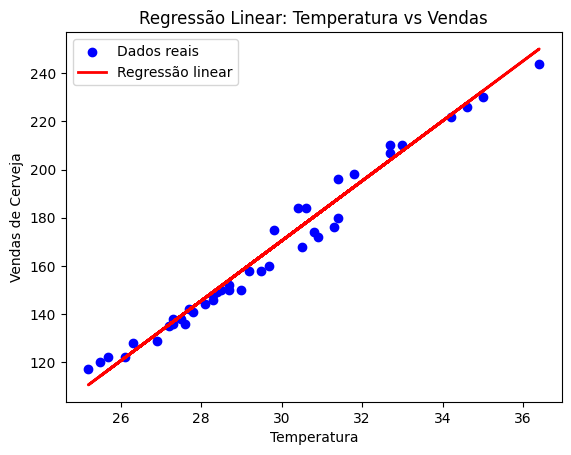

In [24]:
# Gráfico de dispersão com a linha de regressão
plt.scatter(X_test, y_test, color='blue', label='Dados reais')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regressão linear')
plt.xlabel('Temperatura')
plt.ylabel('Vendas de Cerveja')
plt.title('Regressão Linear: Temperatura vs Vendas')
plt.legend()
plt.savefig('VendasCerveja_Regression.png', dpi=200)
plt.show()